In [46]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np


In [47]:
def intervaloConfiancaF1(f1):
    #media - 1,96 x desvioPadrao ; media  + 1,96 x desvioPadrao
    media = mediaAmostral(f1)
    desvioPadrao = desvioPadraoAmostral(f1)

    print("Intervalo de confianca da medida F [{0:.2f};{1:.2f}]".format((media - 1.96 * desvioPadrao), (media + 1.96 * desvioPadrao)))

In [48]:
def desvioPadraoAmostral(accuracyArray):
    return np.std(accuracyArray, ddof = 1)


In [49]:
def mediaAmostral(accuracyArray):
    return np.mean(accuracyArray)

In [50]:
df = pd.read_csv("Skin_NonSkin.txt", sep="\t", header=None)
df.columns = ["B", "G", "R", "Classe"]
#df.head()

In [51]:
x =  df[df.columns[0:3:]]
y = df[df.columns[-1]]

X = x.to_numpy()
Y = y.to_numpy()


In [52]:
f1 = []
maxF1 = []
minF1 = []
media = []

In [53]:
skf = StratifiedKFold(n_splits=100)
skf.get_n_splits(X, Y)

for train_index, test_index in skf.split(X, Y):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]

    knn = KNeighborsClassifier(n_neighbors=1, weights= "distance",metric="euclidean")
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    y_true = y_test

    f1.append(f1_score(y_true,y_pred))
    

In [57]:
minF1 = min(f1)
maxF1 = max(f1)
media = np.mean(f1)

print("medida F\nMinimo = {0}\nMaximo = {1}\nMedia = {2}".format(minF1,maxF1,media))

medida F
Minimo = 0.9769230769230769
Maximo = 1.0
Media = 0.9983080322155553


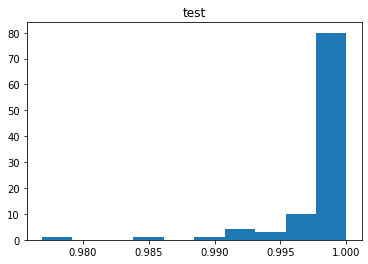

In [55]:
plt.hist(f1)
plt.title("test")
plt.show()

In [56]:
intervaloConfiancaF1(f1)

Intervalo de confianca da medida F [0.99;1.00]
